# Flights Data Exploration Challenge

In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [3]:
# Your code to explore the data
column_name = df_flights.columns.tolist()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis
### 1. Cleaning the data
   #### - Null ( missing values)

In [5]:
df_flights.shape

(271940, 20)

In [6]:
# Identify any null or missing data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [7]:
pd.equal?

Object `pd.equal` not found.


In [8]:
# Let us see how those null column are impacting the departure delay column
import numpy as np
df_flights[["DepDelay", "DepDel15"]][df_flights.DepDel15.isnull()].describe()


,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


In [9]:
# So all the empty value of DepDel15 have their DepDelay equal to 0 that means that they are not delay we will they replace
# the binary DepDel15 by 0 
df_flights.DepDel15.fillna(0, inplace=True)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

#### - Outliers: Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.


Text(0.5, 0, 'Value')

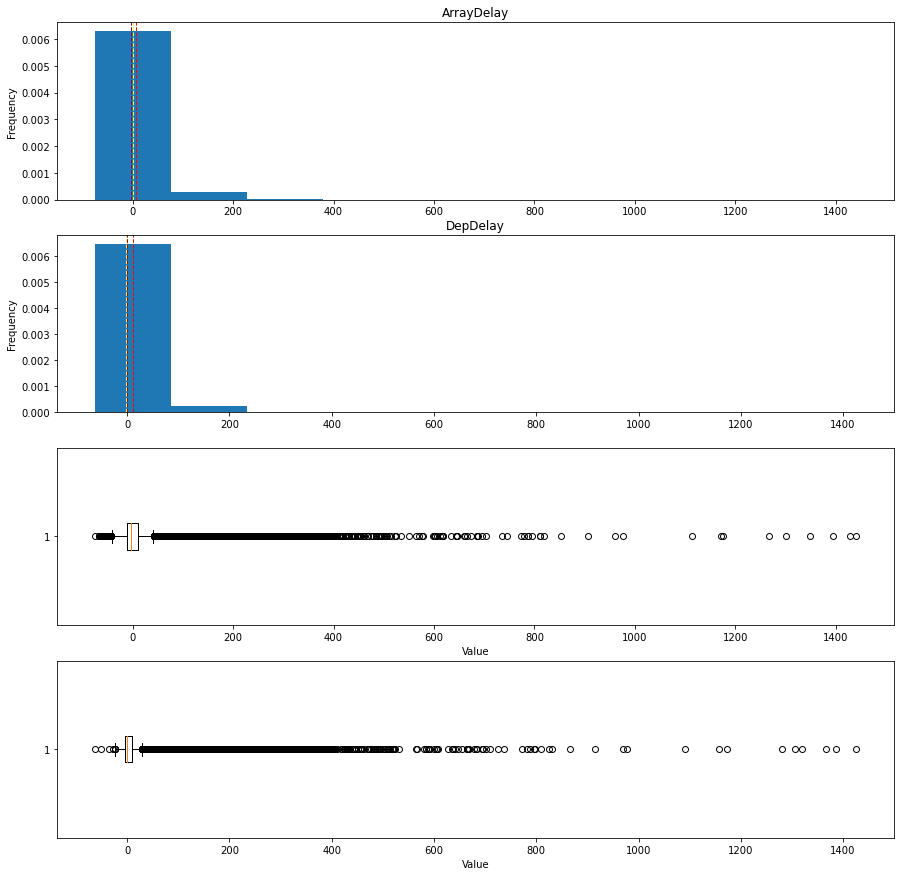

In [11]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15))
ax1.hist(df_flights.ArrDelay, density = True)
ax1.axvline(df_flights.ArrDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax1.set_title("ArrayDelay")
ax1.set_ylabel("Frequency")
ax2.hist(df_flights.DepDelay, density = True)
ax2.axvline(df_flights.DepDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax2.axvline(df_flights.DepDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax2.axvline(df_flights.DepDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax2.set_title("DepDelay")
ax3.boxplot(df_flights.ArrDelay, vert= False)
ax2.set_ylabel("Frequency")
ax3.set_xlabel("Value")
ax4.boxplot(df_flights.DepDelay, vert = False)
ax4.set_xlabel("Value")



<ipython-input-53-f828630f70e3>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

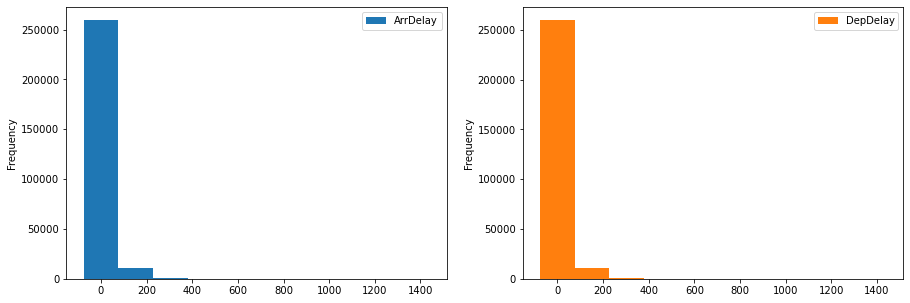

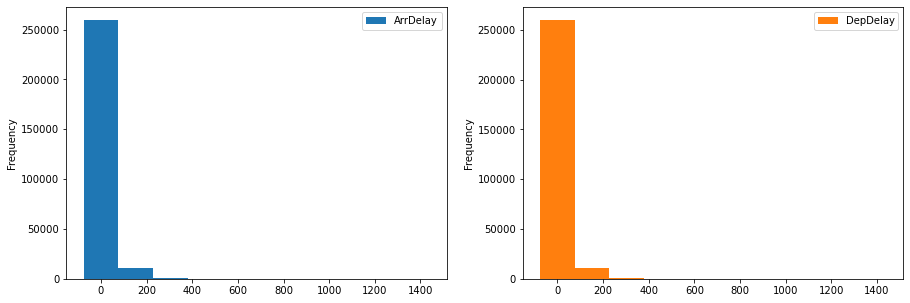

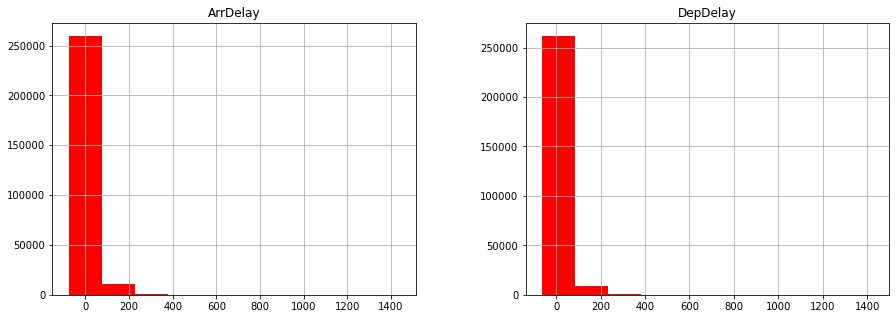

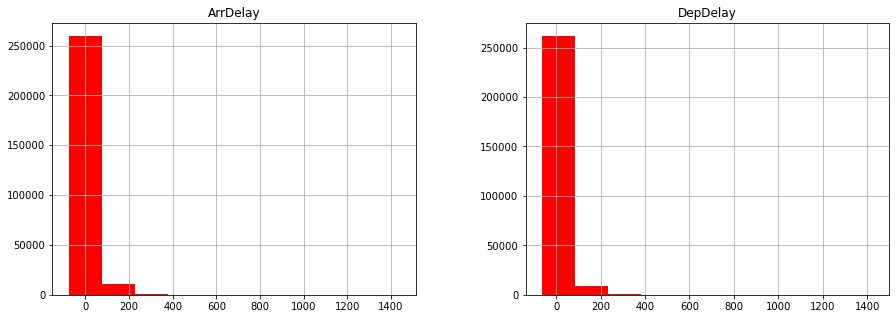

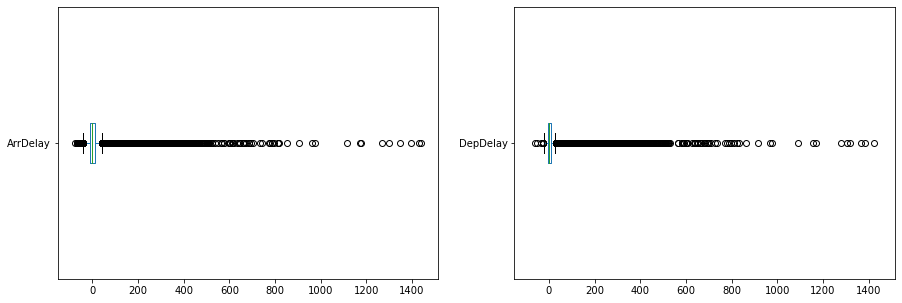

In [53]:
fig = plt.figure()

# multiples methods of plotting style a DataFrame
df_flights[["ArrDelay", "DepDelay"]].plot(kind = "hist", subplots = True, layout=(1, 2), figsize = (15, 5))
df_flights[["ArrDelay", "DepDelay"]].plot.hist(subplots = True, layout=(1, 2), figsize = (15, 5))
df_flights[["ArrDelay", "DepDelay"]].hist(layout=(1, 2), figsize = (15, 5), color = "red") # subplot is implicite
df_flights.hist(["ArrDelay", "DepDelay"], layout=(1, 2), figsize = (15, 5), color = "red") # subplot is implicite

# lets use one method for boxplot
df_flights[["ArrDelay", "DepDelay"]].plot.box(subplots = True, layout=(1, 2), figsize = (15, 5), vert = False)

fig.show()

>- They are a lot of Outliers. Let us trim outliers based on 1% and 90% percentiles

In [50]:
df_flights.hist?

In [ ]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]


In [ ]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,20))
ax1.hist(df_flights.ArrDelay, density = True)
ax1.axvline(df_flights.ArrDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax1.axvline(df_flights.ArrDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax1.set_title("ArrayDelay")
ax1.set_ylabel("Frequency")
ax3.hist(df_flights.DepDelay, density = True)
ax3.axvline(df_flights.DepDelay.mean(), color = "red", linestyle = "dashed", linewidth = 1)
ax3.axvline(df_flights.DepDelay.median(), color = "purple", linestyle = "dashed", linewidth = 1)
ax3.axvline(df_flights.DepDelay.mode()[0], color = "yellow", linestyle = "dashed", linewidth = 1)

ax3.set_title("DepDelay")
ax2.boxplot(df_flights.ArrDelay, vert= False)
ax3.set_ylabel("Frequency")
ax2.set_xlabel("Value")
ax4.boxplot(df_flights.DepDelay, vert = False)
ax4.set_xlabel("Value")

fig.show()

In [ ]:
# df_flights.plot(["ArrDelay", "DepDelay"], kind = 'hist', subplots = True, title = ["ArrDelay", "DepDelay"])
df_flights[["ArrDelay", "DepDelay"]].hist()
df_flights[["ArrDelay", "DepDelay"]].boxplot(vert = False )